In [1]:
pwd

'C:\\Users\\Jian Wang\\Desktop\\tmdb'

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 0212-CE0A

 Directory of C:\Users\Jian Wang\Desktop\tmdb

2019/04/23  10:25    <DIR>          .
2019/04/23  10:25    <DIR>          ..
2019/04/23  10:25    <DIR>          .ipynb_checkpoints
2019/04/23  10:24    <DIR>          input
2019/04/15  09:26             2,233 tmdb.py
2019/04/23  10:23                 0 tmdb过程.docx
2019/04/23  10:25               889 Untitled.ipynb
               3 File(s)          3,122 bytes
               4 Dir(s)  52,158,803,968 bytes free


In [3]:
ls input

 Volume in drive C is Windows
 Volume Serial Number is 0212-CE0A

 Directory of C:\Users\Jian Wang\Desktop\tmdb\input

2019/04/23  10:24    <DIR>          .
2019/04/23  10:24    <DIR>          ..
2019/02/06  23:32            61,585 sample_submission.csv
2019/02/06  23:32        41,868,556 test.csv
2019/02/06  23:32        28,311,747 train.csv
               3 File(s)     70,241,888 bytes
               2 Dir(s)  52,132,642,816 bytes free


In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [26]:
train = pd.read_csv('input/train.csv')

In [53]:
test = pd.read_csv('input/test.csv')

In [7]:
sample = pd.read_csv('input/sample_submission.csv')

In [29]:
train.shape

(3000, 23)

In [30]:
test.shape

(4398, 22)

In [12]:
sample.shape

(4398, 2)

In [31]:
train.dtypes.sort_values()

id                         int64
budget                     int64
revenue                    int64
popularity               float64
runtime                  float64
genres                    object
cast                      object
Keywords                  object
title                     object
tagline                   object
status                    object
spoken_languages          object
release_date              object
production_countries      object
crew                      object
poster_path               object
overview                  object
original_title            object
original_language         object
imdb_id                   object
homepage                  object
belongs_to_collection     object
production_companies      object
dtype: object

In [32]:
train.select_dtypes(include='int64').head()

,id,budget,revenue
0,1,14000000,12314651
1,2,40000000,95149435
2,3,3300000,13092000
3,4,1200000,16000000
4,5,0,3923970


In [33]:
train.select_dtypes(include='float64').head()

,popularity,runtime
0,6.575393,93.0
1,8.248895,113.0
2,64.299990,105.0
3,3.174936,122.0
4,1.148070,118.0


In [34]:
train.select_dtypes(include='object').head()

,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,Keywords,cast,crew
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,"[{'id': 107674, 'name': 'The Princess Diaries ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,NaN,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."


In [76]:
train.isnull().sum()[data.isnull().sum()>0]

belongs_to_collection    0
genres                   0
homepage                 0
overview                 0
poster_path              0
production_companies     0
production_countries     0
runtime                  0
spoken_languages         0
tagline                  0
Keywords                 0
cast                     0
crew                     0
dtype: int64

In [55]:
train.belongs_to_collection = train.belongs_to_collection.fillna("unknow")
test.belongs_to_collection = test.belongs_to_collection.fillna("unknow")

In [56]:
train.genres = train.genres.fillna("unknow")
test.genres = test.genres.fillna("unknow")

In [57]:
train.homepage = train.homepage.fillna("unknow")
test.homepage = test.homepage.fillna("unknow")

In [58]:
train.overview = train.overview.fillna("unknow")
test.overview = test.overview.fillna("unknow")

In [59]:
train.poster_path = train.poster_path.fillna("unknow")
test.poster_path = test.poster_path.fillna("unknow")

In [60]:
train.production_companies = train.production_companies.fillna("unknow")
test.production_companies = test.production_companies.fillna("unknow")

In [61]:
train.production_countries = train.production_countries.fillna("unknow")
test.production_countries = test.production_countries.fillna("unknow")

In [62]:
train.runtime = train.runtime.fillna(train.runtime.mean())
test.runtime = test.runtime.fillna(train.runtime.mean())

In [67]:
train.spoken_languages = train.spoken_languages.fillna("unknow")
test.spoken_languages = test.spoken_languages.fillna("unknow")

In [68]:
train.tagline = train.tagline.fillna("unknow")
test.tagline = test.tagline.fillna("unknow")

In [73]:
train.Keywords = train.Keywords.fillna("unknow")
test.Keywords = test.Keywords.fillna("unknow")

In [74]:
train.cast = train.cast.fillna("unknow")
test.cast = test.cast.fillna("unknow")

In [75]:
train.crew = train.crew.fillna("unknow")
test.crew = test.crew.fillna("unknow")

In [80]:
warnings.filterwarnings(action="ignore")

In [96]:
plt.figure(figsize=[12, 12])
plt.subplot(3, 3, 1)
sns.barplot('budget', 'revenue', data=train)
plt.subplot(3, 3, 2)
sns.barplot('popularity', 'revenue', data=train)
plt.subplot(3, 3, 3)
sns.barplot('runtime', 'revenue', data=train)
plt.subplot(3, 3, 4)
sns.barplot('genres', 'revenue', data=train)
plt.subplot(3, 3, 5)
sns.barplot('cast', 'revenue', data=train)
plt.subplot(3, 3, 6)
sns.barplot('Keywords', 'revenue', data=train)
plt.subplot(3, 3, 7)
sns.barplot('title', 'revenue', data=train)
plt.subplot(3, 3, 8)
sns.barplot('tagline', 'revenue', data=train)
plt.subplot(3, 3, 9)
sns.barplot('status', 'revenue', data=train)

ValueError: Image size of 145117x710 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 864x864 with 9 Axes>

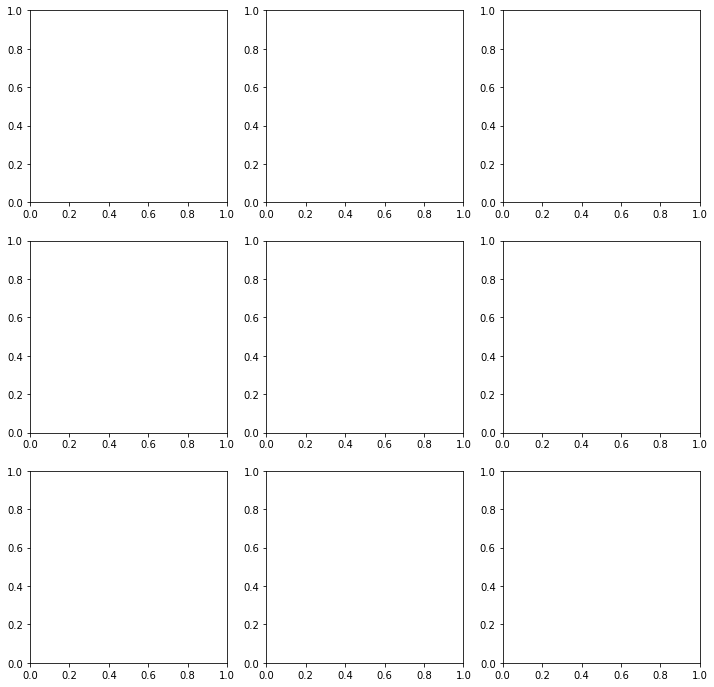

In [94]:
plt.figure(figsize=[12, 12])
plt.subplot(3, 3, 1)
#sns.barplot('budget', 'revenue', data=train)
plt.subplot(3, 3, 2)
plt.subplot(3, 3, 3)
plt.subplot(3, 3, 4)
plt.subplot(3, 3, 5)
plt.subplot(3, 3, 6)
plt.subplot(3, 3, 7)
plt.subplot(3, 3, 8)
plt.subplot(3, 3, 9)

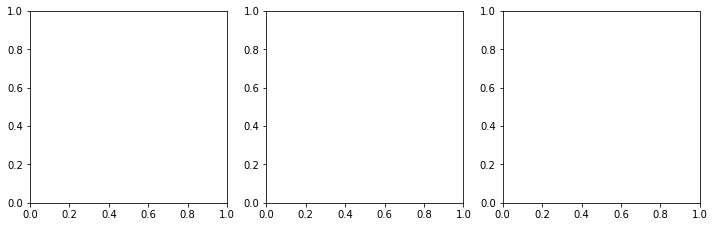

In [95]:
plt.figure(figsize=[12, 12])
plt.subplot(3, 3, 1)
#sns.barplot('budget', 'revenue', data=train)
plt.subplot(3, 3, 2)
plt.subplot(3, 3, 3)

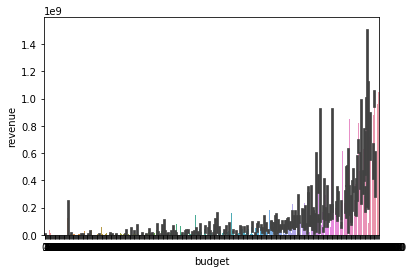

In [97]:
sns.barplot('budget', 'revenue', data=train)

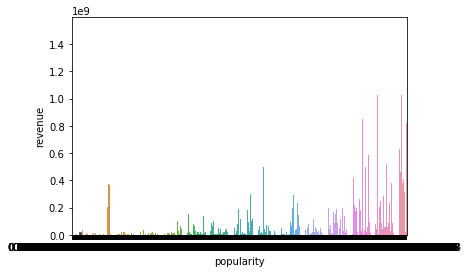

In [98]:
sns.barplot('popularity', 'revenue', data=train)

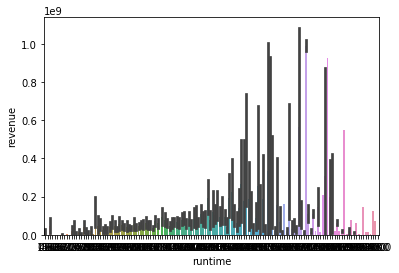

In [99]:
sns.barplot('runtime', 'revenue', data=train)

In [110]:
train.genres[1]

"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]"

In [113]:
train.original_language.value_counts()

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
nl       6
pt       6
fa       5
da       5
ro       4
tr       3
hu       3
no       2
pl       2
te       2
fi       2
ml       2
sr       1
bn       1
cs       1
mr       1
nb       1
he       1
vi       1
id       1
el       1
ar       1
ur       1
Name: original_language, dtype: int64

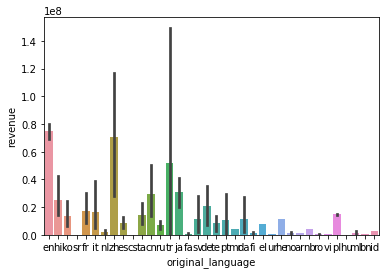

In [114]:
sns.barplot('original_language', 'revenue', data=train)

In [116]:
train.status.value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

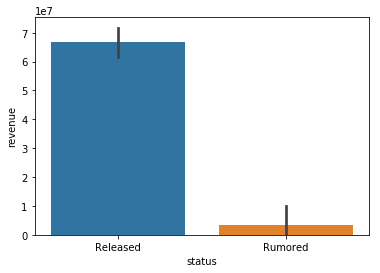

In [117]:
sns.barplot('status', 'revenue', data=train)

In [130]:
train.spoken_languages[3]

"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]"